In [1]:
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn
import yfinance

from rfcorr.random_forest import get_corr, get_pairwise_corr

In [2]:
rs = numpy.random.RandomState(42)

In [3]:
# fetch all symbols
symbol_list = ["SPY",
              "XLB",
              "XLE",
              "XLF",
               "XLI",
               "XLK",
               "XLP",
               "XLU",
               "XLV",
               "XLRE",
              ]

symbol_df = yfinance.download(symbol_list, progress=False)
symbol_df = symbol_df.dropna(axis=0)
print(symbol_df.shape)

(1604, 60)


In [4]:
close_close_ret_df = numpy.log(symbol_df.loc[:, "Adj Close"]).diff().iloc[1:]
close_close_ret_df.tail()

,SPY,XLB,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV
Date,,,,,,,,,,
2022-02-14,-0.003275,-0.008248,-0.023859,-0.011283,-0.003731,-0.000323,-0.002795,-0.010847,-0.008540,-0.010264
2022-02-15,0.015998,0.018199,-0.010528,0.013524,0.014940,0.025946,0.001731,0.004885,-0.004675,0.011184
2022-02-16,0.001120,0.007281,0.008052,0.000746,0.005261,-0.001007,0.001861,0.002654,0.002265,0.001533
2022-02-17,-0.021593,-0.017232,-0.001605,-0.025171,-0.018485,-0.030378,0.007672,-0.008652,0.000603,-0.016214
2022-02-18,-0.006496,-0.001668,-0.006153,-0.000255,-0.008304,-0.010182,0.001843,-0.004466,-0.001810,-0.007501


In [5]:
ret_corr_classification_df = pandas.DataFrame(get_pairwise_corr(close_close_ret_df.values, num_trees=1000, lag=0, method="classification", random_state=rs),
                                                columns=close_close_ret_df.columns,
                                                index=close_close_ret_df.columns)
ret_corr_classification_df

,SPY,XLB,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV
SPY,1.000000,0.121946,0.046780,0.117869,0.165662,0.351534,0.043415,0.036626,0.023824,0.092345
XLB,0.201360,1.000000,0.097177,0.117095,0.273428,0.075918,0.060986,0.052239,0.051959,0.069839
XLE,0.119905,0.160960,1.000000,0.175382,0.168844,0.086452,0.073452,0.069477,0.070411,0.075119
XLF,0.219987,0.123490,0.113275,1.000000,0.223864,0.082230,0.056968,0.055013,0.055974,0.069199
XLI,0.213086,0.255212,0.089691,0.172107,1.000000,0.072035,0.052548,0.044729,0.044349,0.056244
XLK,0.415568,0.081235,0.063024,0.076725,0.100521,1.000000,0.055783,0.047740,0.045450,0.113954
XLP,0.161008,0.085791,0.066133,0.069087,0.097270,0.074121,1.000000,0.166855,0.181932,0.097803
XLRE,0.125143,0.076712,0.071734,0.072005,0.081011,0.089125,0.186546,1.000000,0.209387,0.088337
XLU,0.084533,0.076636,0.076306,0.084619,0.075427,0.074769,0.198773,0.240141,1.000000,0.088796
XLV,0.265732,0.093652,0.078153,0.087143,0.103887,0.148914,0.088114,0.067517,0.066888,1.000000


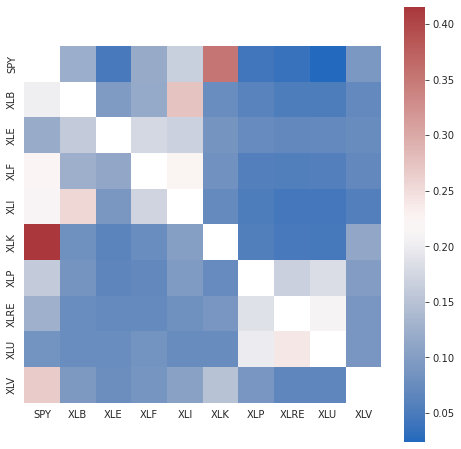

In [6]:
with seaborn.axes_style("white"):
    f, ax = plt.subplots(figsize=(8, 8))
    for i in range(ret_corr_classification_df.shape[0]):
        ret_corr_classification_df.values[i, i] = numpy.nan
    ax = seaborn.heatmap(ret_corr_classification_df, square=True, cmap="vlag")

In [7]:
ret_corr_regression_df = pandas.DataFrame(get_pairwise_corr(close_close_ret_df.values, num_trees=1000, lag=0, method="regression", random_state=rs),
                                                columns=close_close_ret_df.columns,
                                                index=close_close_ret_df.columns)
ret_corr_regression_df

,SPY,XLB,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV
SPY,1.000000,0.036085,0.010225,0.048328,0.144311,0.636766,0.023210,0.025414,0.012158,0.063502
XLB,0.105823,1.000000,0.048527,0.077704,0.618521,0.028244,0.024983,0.039185,0.030442,0.026573
XLE,0.072634,0.181620,1.000000,0.370902,0.139214,0.048123,0.035177,0.060621,0.041964,0.049744
XLF,0.126873,0.074430,0.055881,1.000000,0.595919,0.034571,0.017859,0.049231,0.020850,0.024386
XLI,0.370924,0.313368,0.026608,0.168741,1.000000,0.020029,0.015074,0.050071,0.012020,0.023166
XLK,0.814755,0.017974,0.016708,0.044685,0.025977,1.000000,0.026876,0.020211,0.012857,0.019956
XLP,0.295543,0.036200,0.025787,0.034180,0.044434,0.087769,1.000000,0.110357,0.203633,0.162098
XLRE,0.169131,0.090183,0.033471,0.074032,0.102089,0.037693,0.088320,1.000000,0.358004,0.047077
XLU,0.042776,0.100935,0.043028,0.047601,0.030324,0.034645,0.192123,0.441853,1.000000,0.066716
XLV,0.669819,0.035896,0.032834,0.036792,0.035990,0.059142,0.063971,0.031904,0.033652,1.000000


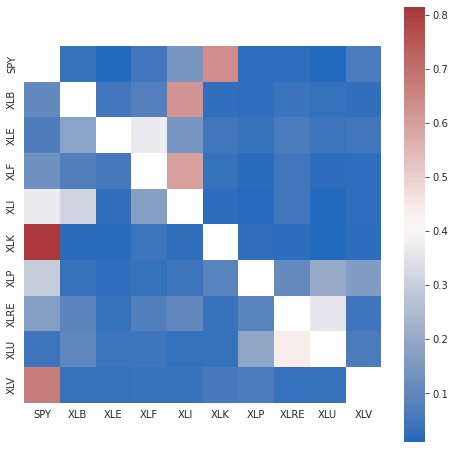

In [8]:
with seaborn.axes_style("white"):
    f, ax = plt.subplots(figsize=(8, 8))
    for i in range(ret_corr_regression_df.shape[0]):
        ret_corr_regression_df.values[i, i] = numpy.nan
    ax = seaborn.heatmap(ret_corr_regression_df, square=True, cmap="vlag")

In [9]:
ret_corr_regression_permu_df = pandas.DataFrame(get_pairwise_corr(close_close_ret_df.values, num_trees=1000, lag=0, method="regression", use_permutation=True, random_state=rs),
                                                columns=close_close_ret_df.columns,
                                                index=close_close_ret_df.columns)
ret_corr_regression_permu_df

,SPY,XLB,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV
SPY,1.000000,0.012594,0.003955,0.031016,0.079451,0.624035,0.007782,0.009472,0.003341,0.030568
XLB,0.133237,1.000000,0.069727,0.049351,1.010708,0.024763,0.030162,0.023854,0.022359,0.026644
XLE,0.108944,0.271149,1.000000,0.524728,0.140608,0.084393,0.045294,0.048521,0.048056,0.065494
XLF,0.257403,0.042725,0.065333,1.000000,0.824981,0.069935,0.017452,0.027637,0.023665,0.021920
XLI,0.319367,0.254825,0.022478,0.142905,1.000000,0.017986,0.014021,0.026473,0.010656,0.017285
XLK,2.662225,0.010980,0.022874,0.090442,0.024849,1.000000,0.020389,0.017452,0.008671,0.013265
XLP,0.367231,0.034344,0.029509,0.041783,0.043967,0.074105,1.000000,0.119551,0.302304,0.127445
XLRE,0.265348,0.069403,0.038614,0.057145,0.067026,0.045914,0.110237,1.000000,0.513875,0.038103
XLU,0.037642,0.072365,0.048621,0.080754,0.034070,0.052513,0.396323,0.676565,1.000000,0.050727
XLV,2.013457,0.035442,0.055195,0.073857,0.047598,0.094268,0.060440,0.031254,0.029095,1.000000


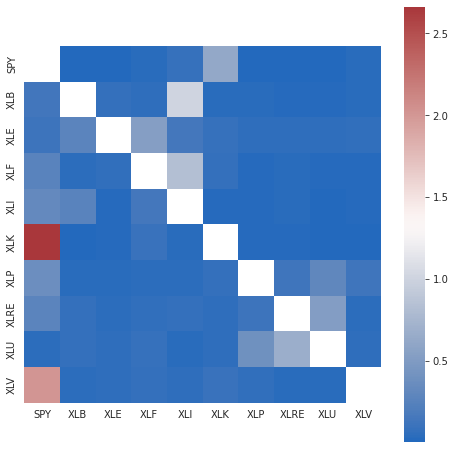

In [19]:
with seaborn.axes_style("white"):
    f, ax = plt.subplots(figsize=(8, 8))
    for i in range(ret_corr_regression_permu_df.shape[0]):
        ret_corr_regression_permu_df.values[i, i] = numpy.nan
    ax = seaborn.heatmap(ret_corr_regression_permu_df, square=True, cmap="vlag")

In [10]:
ret_lag_corr_classification_df = pandas.DataFrame(get_pairwise_corr(close_close_ret_df.values, num_trees=1000, lag=1, method="classification", random_state=rs),
                                                columns=close_close_ret_df.columns,
                                                index=close_close_ret_df.columns)
ret_lag_corr_classification_df

,SPY,XLB,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV
SPY,1.000000,0.108519,0.116630,0.112793,0.109540,0.115031,0.107695,0.108680,0.109342,0.111768
XLB,0.107120,1.000000,0.113633,0.111704,0.114585,0.109717,0.109669,0.107312,0.111435,0.114825
XLE,0.107774,0.112400,1.000000,0.114914,0.109934,0.109177,0.109958,0.114083,0.110715,0.111046
XLF,0.105822,0.108353,0.111196,1.000000,0.112470,0.109647,0.110946,0.116715,0.113220,0.111632
XLI,0.105498,0.110259,0.112438,0.111803,1.000000,0.113509,0.110405,0.108818,0.110232,0.117038
XLK,0.111563,0.109249,0.116514,0.111439,0.107466,1.000000,0.105898,0.113473,0.110775,0.113624
XLP,0.109282,0.114371,0.118687,0.111601,0.108575,0.103219,1.000000,0.113028,0.110417,0.110819
XLRE,0.106654,0.111630,0.119987,0.108221,0.104939,0.112162,0.110565,1.000000,0.114102,0.111741
XLU,0.105814,0.113811,0.124643,0.107738,0.111589,0.104515,0.108311,0.111185,1.000000,0.112393
XLV,0.106827,0.110919,0.115205,0.106175,0.110421,0.112313,0.113194,0.109594,0.115353,1.000000


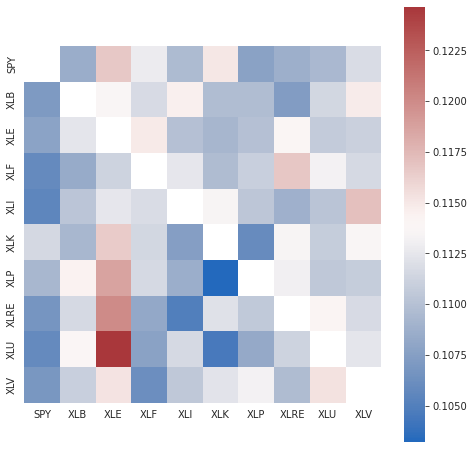

In [11]:
with seaborn.axes_style("white"):
    f, ax = plt.subplots(figsize=(8, 8))
    for i in range(ret_lag_corr_classification_df.shape[0]):
        ret_lag_corr_classification_df.values[i, i] = numpy.nan
    ax = seaborn.heatmap(ret_lag_corr_classification_df, square=True, cmap="vlag")

In [12]:
ret_lag_corr_regression_df = pandas.DataFrame(get_pairwise_corr(close_close_ret_df.values, num_trees=1000, lag=1, method="regression", random_state=rs),
                                                columns=close_close_ret_df.columns,
                                                index=close_close_ret_df.columns)
ret_lag_corr_regression_df

,SPY,XLB,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV
SPY,1.000000,0.104523,0.118999,0.096824,0.084323,0.107596,0.152296,0.084852,0.130825,0.119762
XLB,0.078492,1.000000,0.131450,0.097918,0.092469,0.098978,0.157016,0.090933,0.117471,0.135274
XLE,0.080733,0.098663,1.000000,0.160212,0.132893,0.092134,0.144642,0.092155,0.100927,0.097640
XLF,0.070420,0.104900,0.130674,1.000000,0.087973,0.091398,0.168656,0.094755,0.123368,0.127855
XLI,0.076597,0.105265,0.114290,0.099367,1.000000,0.096019,0.152708,0.096249,0.128184,0.131320
XLK,0.100962,0.103608,0.115692,0.111367,0.089625,1.000000,0.121335,0.105979,0.123771,0.127662
XLP,0.090670,0.088610,0.116502,0.108201,0.104347,0.113037,1.000000,0.103385,0.164882,0.110367
XLRE,0.070602,0.098693,0.110707,0.111502,0.088082,0.104513,0.152535,1.000000,0.136596,0.126770
XLU,0.075405,0.100558,0.123231,0.105450,0.098279,0.095779,0.163742,0.110963,1.000000,0.126593
XLV,0.081311,0.106432,0.131392,0.107720,0.098820,0.098243,0.122943,0.103921,0.149219,1.000000


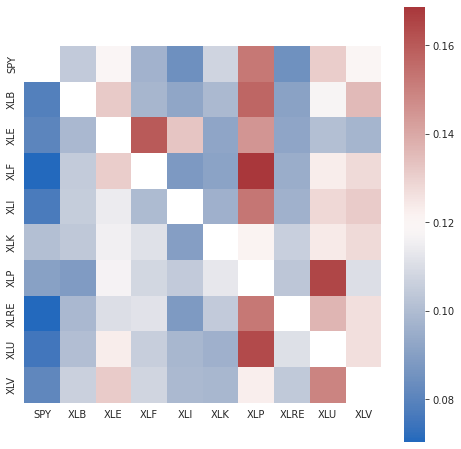

In [13]:
with seaborn.axes_style("white"):
    f, ax = plt.subplots(figsize=(8, 8))
    for i in range(ret_lag_corr_regression_df.shape[0]):
        ret_lag_corr_regression_df.values[i, i] = numpy.nan
    ax = seaborn.heatmap(ret_lag_corr_regression_df, square=True, cmap="vlag")

In [14]:
try:
    v, h = numpy.linalg.eig(ret_lag_corr_regression_df.fillna(1.0))
    print(numpy.abs(v))
except Exception as e:
    print(e)       

[2.         0.83191542 0.86844705 0.86844705 0.93183064 0.88447787
 0.88447787 0.90965443 0.90965443 0.91177964]


In [15]:
ret_pearson_corr_df = close_close_ret_df.corr(method="pearson")
ret_pearson_corr_df

,SPY,XLB,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV
SPY,1.000000,0.857552,0.695420,0.859088,0.896057,0.931621,0.764414,0.730028,0.596895,0.855773
XLB,0.857552,1.000000,0.731343,0.828860,0.890134,0.720962,0.651246,0.637021,0.519340,0.706248
XLE,0.695420,0.731343,1.000000,0.757403,0.742909,0.527789,0.464346,0.496482,0.374242,0.524815
XLF,0.859088,0.828860,0.757403,1.000000,0.885186,0.688878,0.623583,0.627593,0.484288,0.695719
XLI,0.896057,0.890134,0.742909,0.885186,1.000000,0.747456,0.685078,0.675858,0.549591,0.733717
XLK,0.931621,0.720962,0.527789,0.688878,0.747456,1.000000,0.649324,0.619035,0.480724,0.766460
XLP,0.764414,0.651246,0.464346,0.623583,0.685078,0.649324,1.000000,0.716649,0.743693,0.708382
XLRE,0.730028,0.637021,0.496482,0.627593,0.675858,0.619035,0.716649,1.000000,0.759381,0.640258
XLU,0.596895,0.519340,0.374242,0.484288,0.549591,0.480724,0.743693,0.759381,1.000000,0.562306
XLV,0.855773,0.706248,0.524815,0.695719,0.733717,0.766460,0.708382,0.640258,0.562306,1.000000


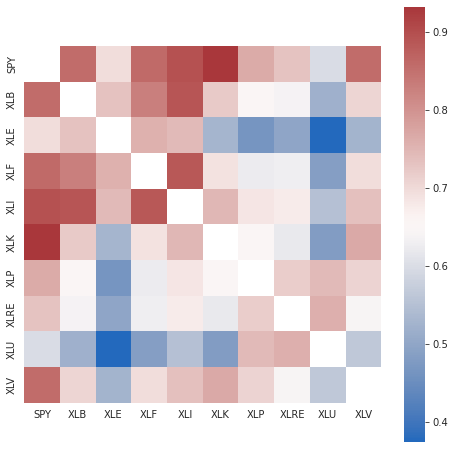

In [16]:
with seaborn.axes_style("white"):
    f, ax = plt.subplots(figsize=(8, 8))
    for i in range(ret_pearson_corr_df.shape[0]):
        ret_pearson_corr_df.values[i, i] = numpy.nan
    ax = seaborn.heatmap(ret_pearson_corr_df, square=True, cmap="vlag")

In [17]:
ret_spearman_corr_df = close_close_ret_df.corr(method="spearman")

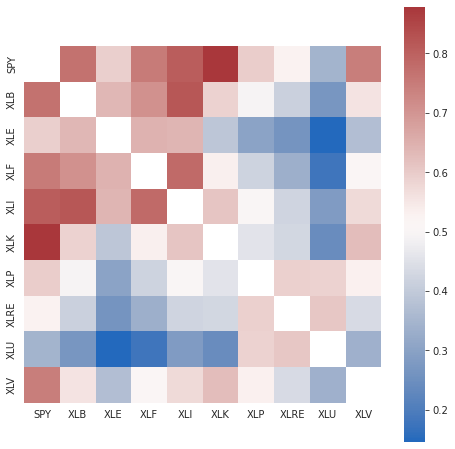

In [18]:
with seaborn.axes_style("white"):
    f, ax = plt.subplots(figsize=(8, 8))
    for i in range(ret_spearman_corr_df.shape[0]):
        ret_spearman_corr_df.values[i, i] = numpy.nan
    ax = seaborn.heatmap(ret_spearman_corr_df, square=True, cmap="vlag")